In [8]:
# Carga de librerias
import pandas as pd
import sys
from sklearn.decomposition import FactorAnalysis, PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# import seaborn as sns
from scipy import stats
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
#pyhton version
print("Version de Python: ", sys.version)

Version de Python:  3.12.1 (v3.12.1:2305ca5144, Dec  7 2023, 17:23:38) [Clang 13.0.0 (clang-1300.0.29.30)]


5h 30 min de trabajo

# LECTURA DE DATOS

* Tabla 1: jugadores

In [9]:
xls = pd.ExcelFile("data.xlsx")
tabla1_raw = pd.read_excel(xls, 'base de datos 1 jugadores')
print(tabla1_raw.shape)
tabla1_raw.head()

(274, 16)


ID  SEXO  EDAD  CATEGORIA  grupo  Categoria deportiva  Influenciapaterna  \
0  163     0    13          3      0                    1                 20   
1  164     0    13          3      0                    1                 20   
2  252     0    12          3      0                    1                 30   
3  251     0    13          3      0                    1                 17   
4  162     0    13          3      0                    1                 16   

   organización  Expectativasallogro  Miedoaloerrores  destre.Aperder  \
0            10                   22               26              16   
1            10                   22               26              16   
2            24                   24               33              20   
3            23                   23               37              19   
4            30                   23               17              19   

   destre.Aganar  dstre.durantejuego  destre.Juegojusto  habilidadessociales  \
0             22                  21                 22                   50   
1             22                  21                 22                   50   
2             20                  21                 20                   49   
3             22                  22                 24                   50   
4             21                  23                 23                   47   

   satisvida  
0         14  
1         14  
2         16  
3         16  
4         17

In [10]:
tabla1_raw.describe()

ID        SEXO        EDAD   CATEGORIA       grupo  \
count  274.000000  274.000000  274.000000  274.000000  274.000000   
mean   151.540146    0.682482   17.583942    4.383212    0.562044   
std     86.023084    0.466363    6.516412    1.673717    0.497043   
min      1.000000    0.000000    8.000000    1.000000    0.000000   
25%     76.250000    0.000000   13.000000    3.000000    0.000000   
50%    156.000000    1.000000   15.000000    4.000000    1.000000   
75%    225.750000    1.000000   21.000000    6.000000    1.000000   
max    298.000000    1.000000   46.000000    6.000000    1.000000   

       Categoria deportiva  Influenciapaterna  organización  \
count           274.000000         274.000000    274.000000   
mean              2.069343          22.142336     22.766423   
std               0.859514           7.850585      5.340786   
min               1.000000           9.000000      7.000000   
25%               1.000000          16.250000     19.000000   
50%               2.000000          20.000000     23.000000   
75%               3.000000          29.000000     27.000000   
max               3.000000          45.000000     30.000000   

       Expectativasallogro  Miedoaloerrores  destre.Aperder  destre.Aganar  \
count           274.000000       274.000000      274.000000     274.000000   
mean             27.138686        28.967153       20.423358      21.492701   
std               6.475858         9.010922        2.812121       2.436359   
min               9.000000        12.000000       13.000000      15.000000   
25%              23.000000        22.000000       18.250000      20.000000   
50%              27.000000        27.000000       21.000000      21.500000   
75%              32.000000        35.750000       23.000000      24.000000   
max              45.000000        54.000000       25.000000      25.000000   

       dstre.durantejuego  destre.Juegojusto  habilidadessociales   satisvida  
count          274.000000         274.000000           274.000000  274.000000  
mean            22.054745          22.186131            53.412409   19.854015  
std              2.287231           2.196824             4.450130    3.523942  
min             16.000000          16.000000            41.000000    9.000000  
25%             21.000000          21.000000            50.250000   18.000000  
50%             23.000000          23.000000            54.000000   20.000000  
75%             24.000000          24.000000            57.000000   23.000000  
max             25.000000          25.000000            60.000000   25.000000

* Tabla 2: niños

In [11]:
tabla2_raw = pd.read_excel(xls, 'base de datos 2 niños')
print(tabla2_raw.shape)
tabla2_raw.head()

(428, 13)


id  SEXO  EDAD  Autovaloración  Autoexperiencia  PrexiónExterna  \
0  388     1    11              12               20               9   
1  300     1     9              19               27              13   
2  299     1     9              20               26              12   
3  274     1     9              22               18              18   
4  363     1    10              15               29              11   

   ExperienciaPersonal  Compañeros  Profesor  Positivos  Negativos     IMC  \
0                   16           9        12         28         14  15.234   
1                   18          11        11         27         17  15.023   
2                   17           9        11         25         16  15.259   
3                   14          10        15         25         15  14.109   
4                   19          10        18         28         14  14.348   

   grupo  
0      1  
1      1  
2      1  
3      1  
4      1

In [12]:
tabla2_raw.describe()

id        SEXO        EDAD  Autovaloración  Autoexperiencia  \
count  428.000000  428.000000  428.000000      428.000000       428.000000   
mean   220.172897    1.478972   10.429907       21.119159        26.280374   
std    127.251831    0.500142    0.836656        7.341921         5.871847   
min      1.000000    1.000000    8.000000        9.000000        11.000000   
25%    110.750000    1.000000   10.000000       15.000000        22.000000   
50%    219.500000    1.000000   11.000000       20.000000        27.000000   
75%    329.250000    2.000000   11.000000       26.000000        30.000000   
max    440.000000    2.000000   12.000000       42.000000        40.000000   

       PrexiónExterna  ExperienciaPersonal  Compañeros    Profesor  \
count      428.000000           428.000000  428.000000  428.000000   
mean        14.102804            19.712617    8.831776   11.969626   
std          5.373514             5.220580    2.552442    3.367639   
min          8.000000             8.000000    3.000000    4.000000   
25%         10.000000            16.000000    7.000000    9.000000   
50%         13.000000            19.000000    9.000000   12.000000   
75%         18.000000            23.000000   11.000000   14.000000   
max         31.000000            35.000000   15.000000   20.000000   

        Positivos   Negativos         IMC       grupo  
count  428.000000  428.000000  428.000000  428.000000  
mean    24.144860   17.380841   18.418540    1.261682  
std      2.931305    3.836507    2.604957    0.440065  
min     15.000000   10.000000   14.020000    1.000000  
25%     22.000000   15.000000   16.539750    1.000000  
50%     24.000000   17.000000   17.816000    1.000000  
75%     26.000000   20.000000   20.408000    2.000000  
max     30.000000   28.000000   27.548000    2.000000

# CALIDAD DE DATOS
* Eliminamos outliers?

Analizamos la multicolinealidad de las variables y posibles valores atípicos
* [esferacidad de Bartlet]?
## Tabla 1: Jugadores
* Multicolinealidad de las variables:

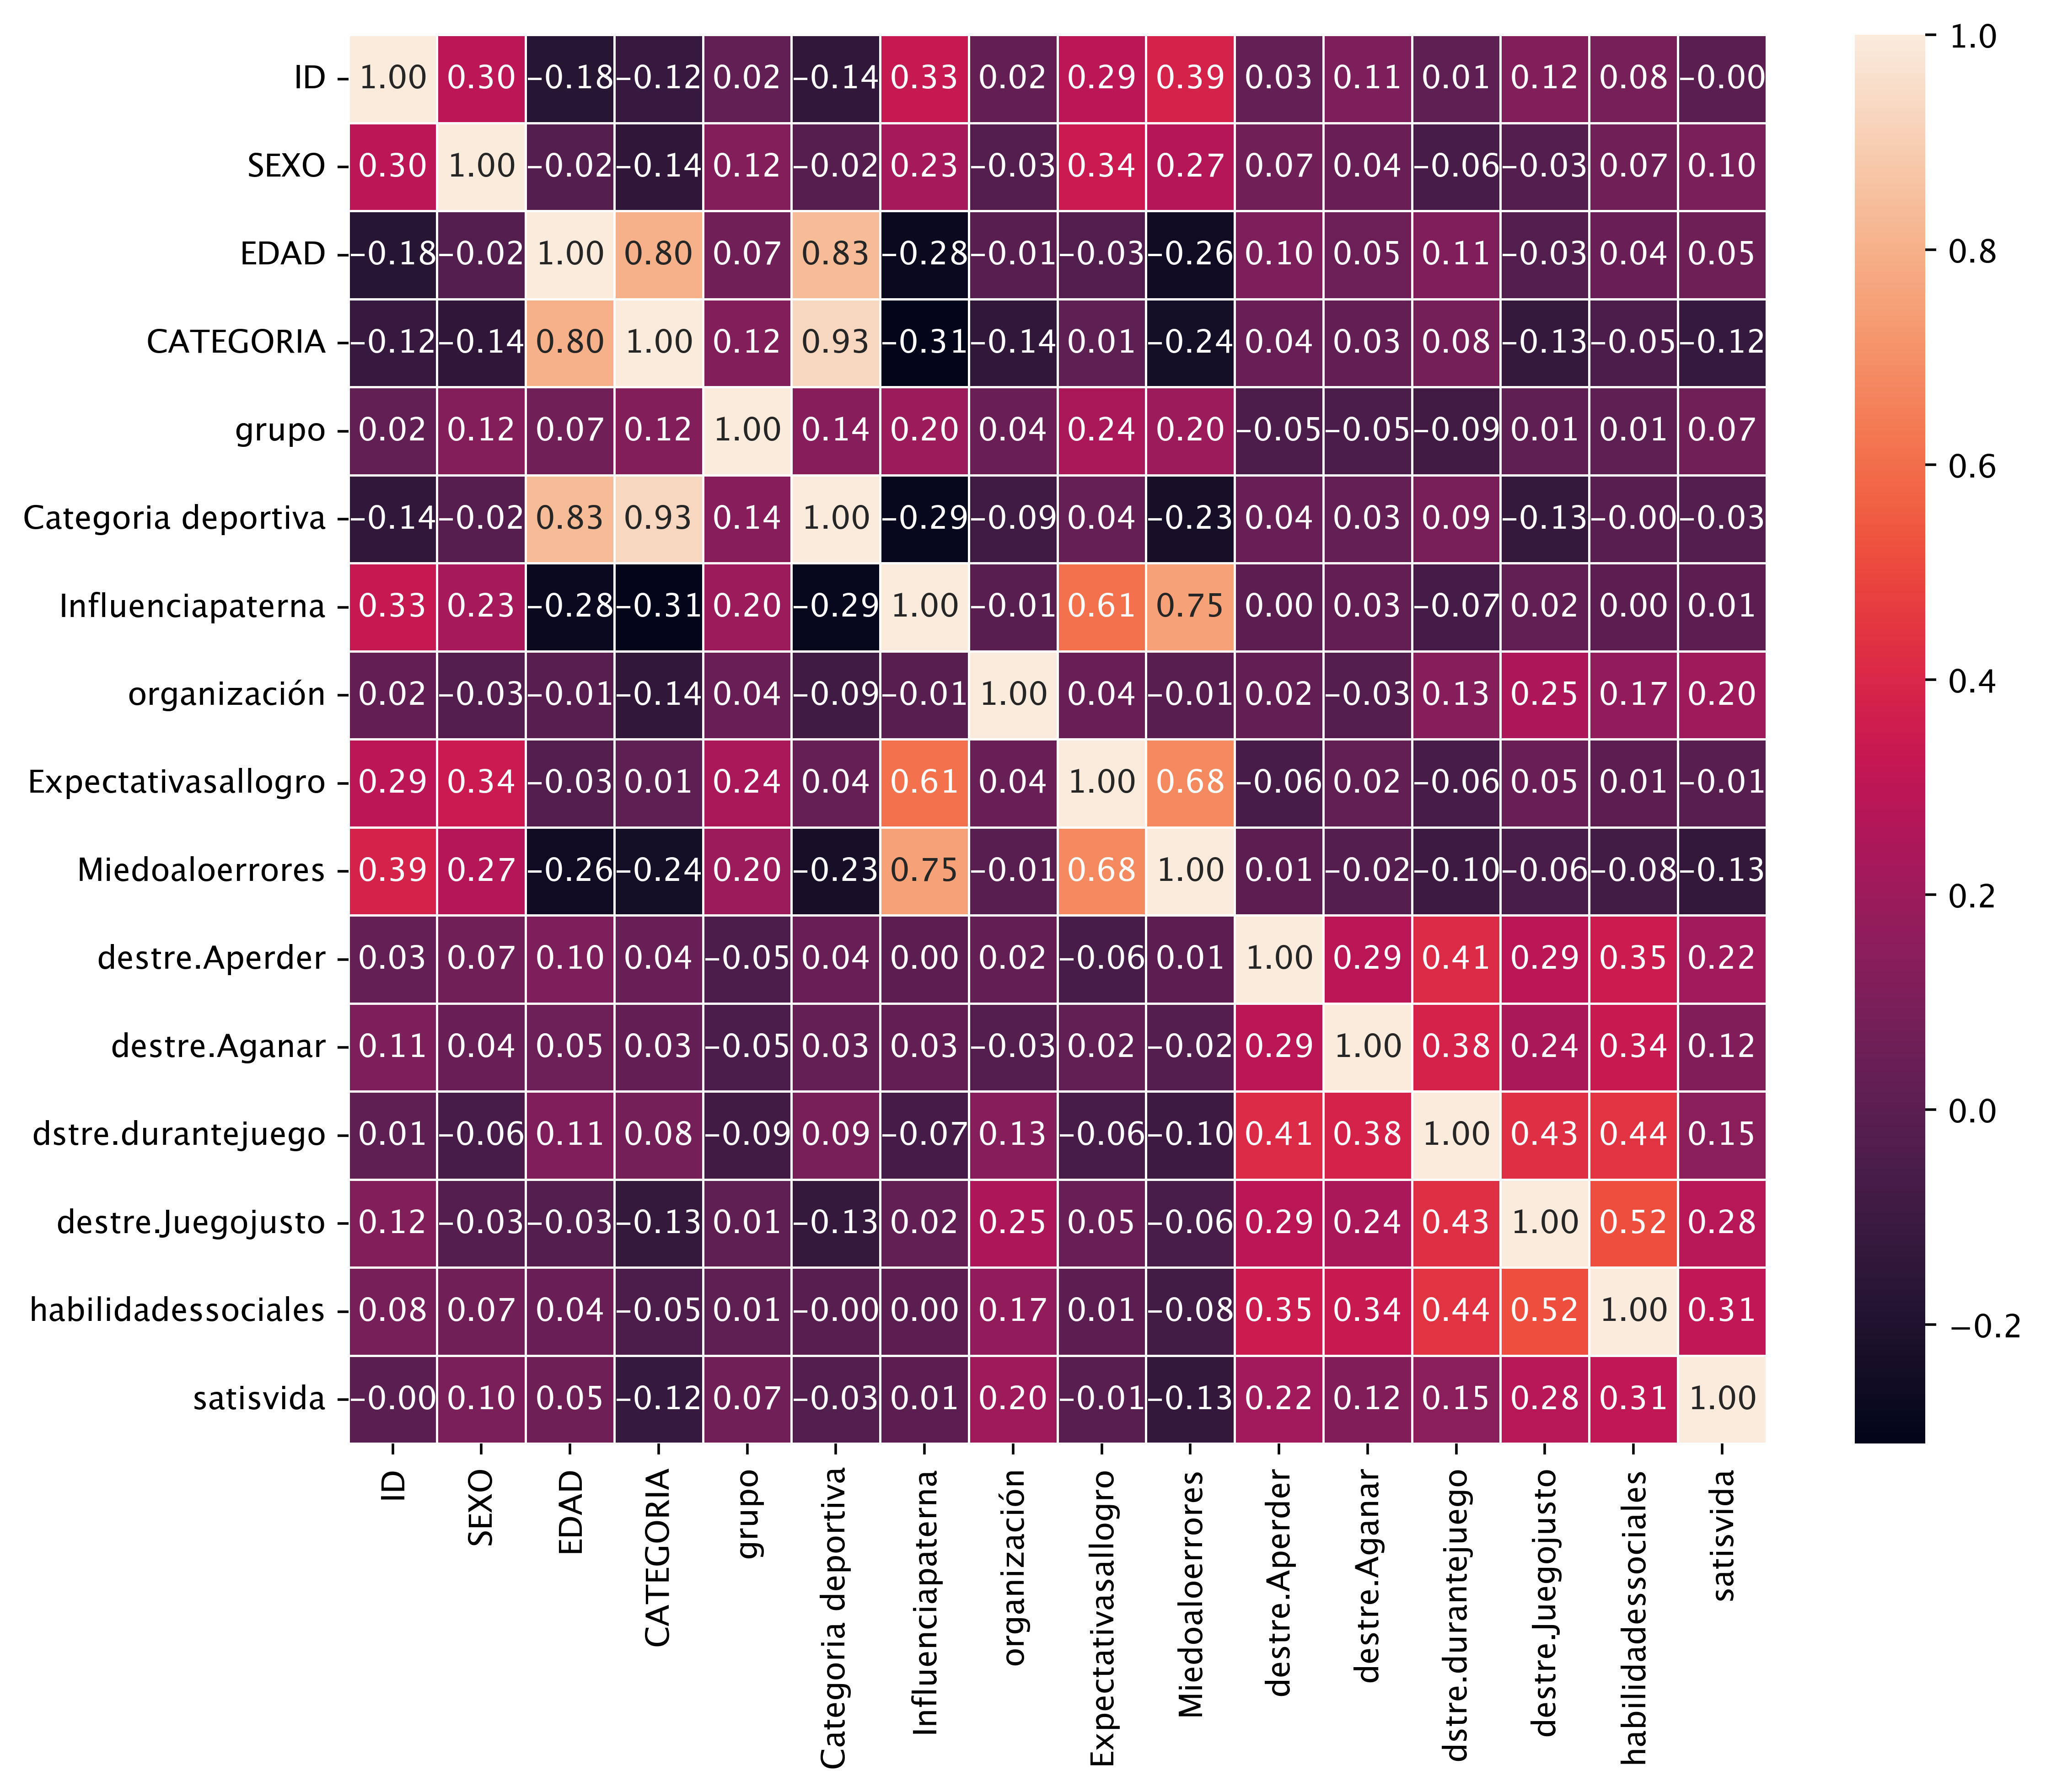

In [13]:
corr = tabla1_raw.corr()
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

* Outiliers:

In [14]:
zscore_df  = tabla1_raw.apply(stats.zscore, axis=0)
thres = 3

print("Que variables tienen outilers?")
print(zscore_df.applymap(lambda x: x>thres).any())

Que variables tienen outilers?
ID                     False
SEXO                   False
EDAD                    True
CATEGORIA              False
grupo                  False
Categoria deportiva    False
Influenciapaterna      False
organización           False
Expectativasallogro    False
Miedoaloerrores        False
destre.Aperder         False
destre.Aganar          False
dstre.durantejuego     False
destre.Juegojusto      False
habilidadessociales    False
satisvida              False
dtype: bool


/var/folders/dq/pwk6csh94hnd65tz2zzcp2br0000gn/T/ipykernel_61844/18405655.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(zscore_df.applymap(lambda x: x>thres).any())


In [15]:
print(zscore_df.loc[zscore_df["EDAD"]>3]["EDAD"])
tabla1_raw.loc[zscore_df["EDAD"]>3]

225    4.368670
254    3.138754
259    3.292494
269    3.138754
Name: EDAD, dtype: float64


ID  SEXO  EDAD  CATEGORIA  grupo  Categoria deportiva  \
225  126     1    46          6      1                    3   
254   70     1    38          6      0                    3   
259  264     1    39          6      1                    3   
269   65     1    38          6      0                    3   

     Influenciapaterna  organización  Expectativasallogro  Miedoaloerrores  \
225                 31            15                   27               35   
254                 13            30                   27               19   
259                 29            30                   31               35   
269                 11            30                   16               13   

     destre.Aperder  destre.Aganar  dstre.durantejuego  destre.Juegojusto  \
225              25             20                  20                 19   
254              19             25                  24                 21   
259              23             23                  23                 25   
269              23             25                  24                 24   

     habilidadessociales  satisvida  
225                   49         20  
254                   58         22  
259                   57         23  
269                   57         25

* los que tienen mas de 37 años

## Tabla 2: Niños

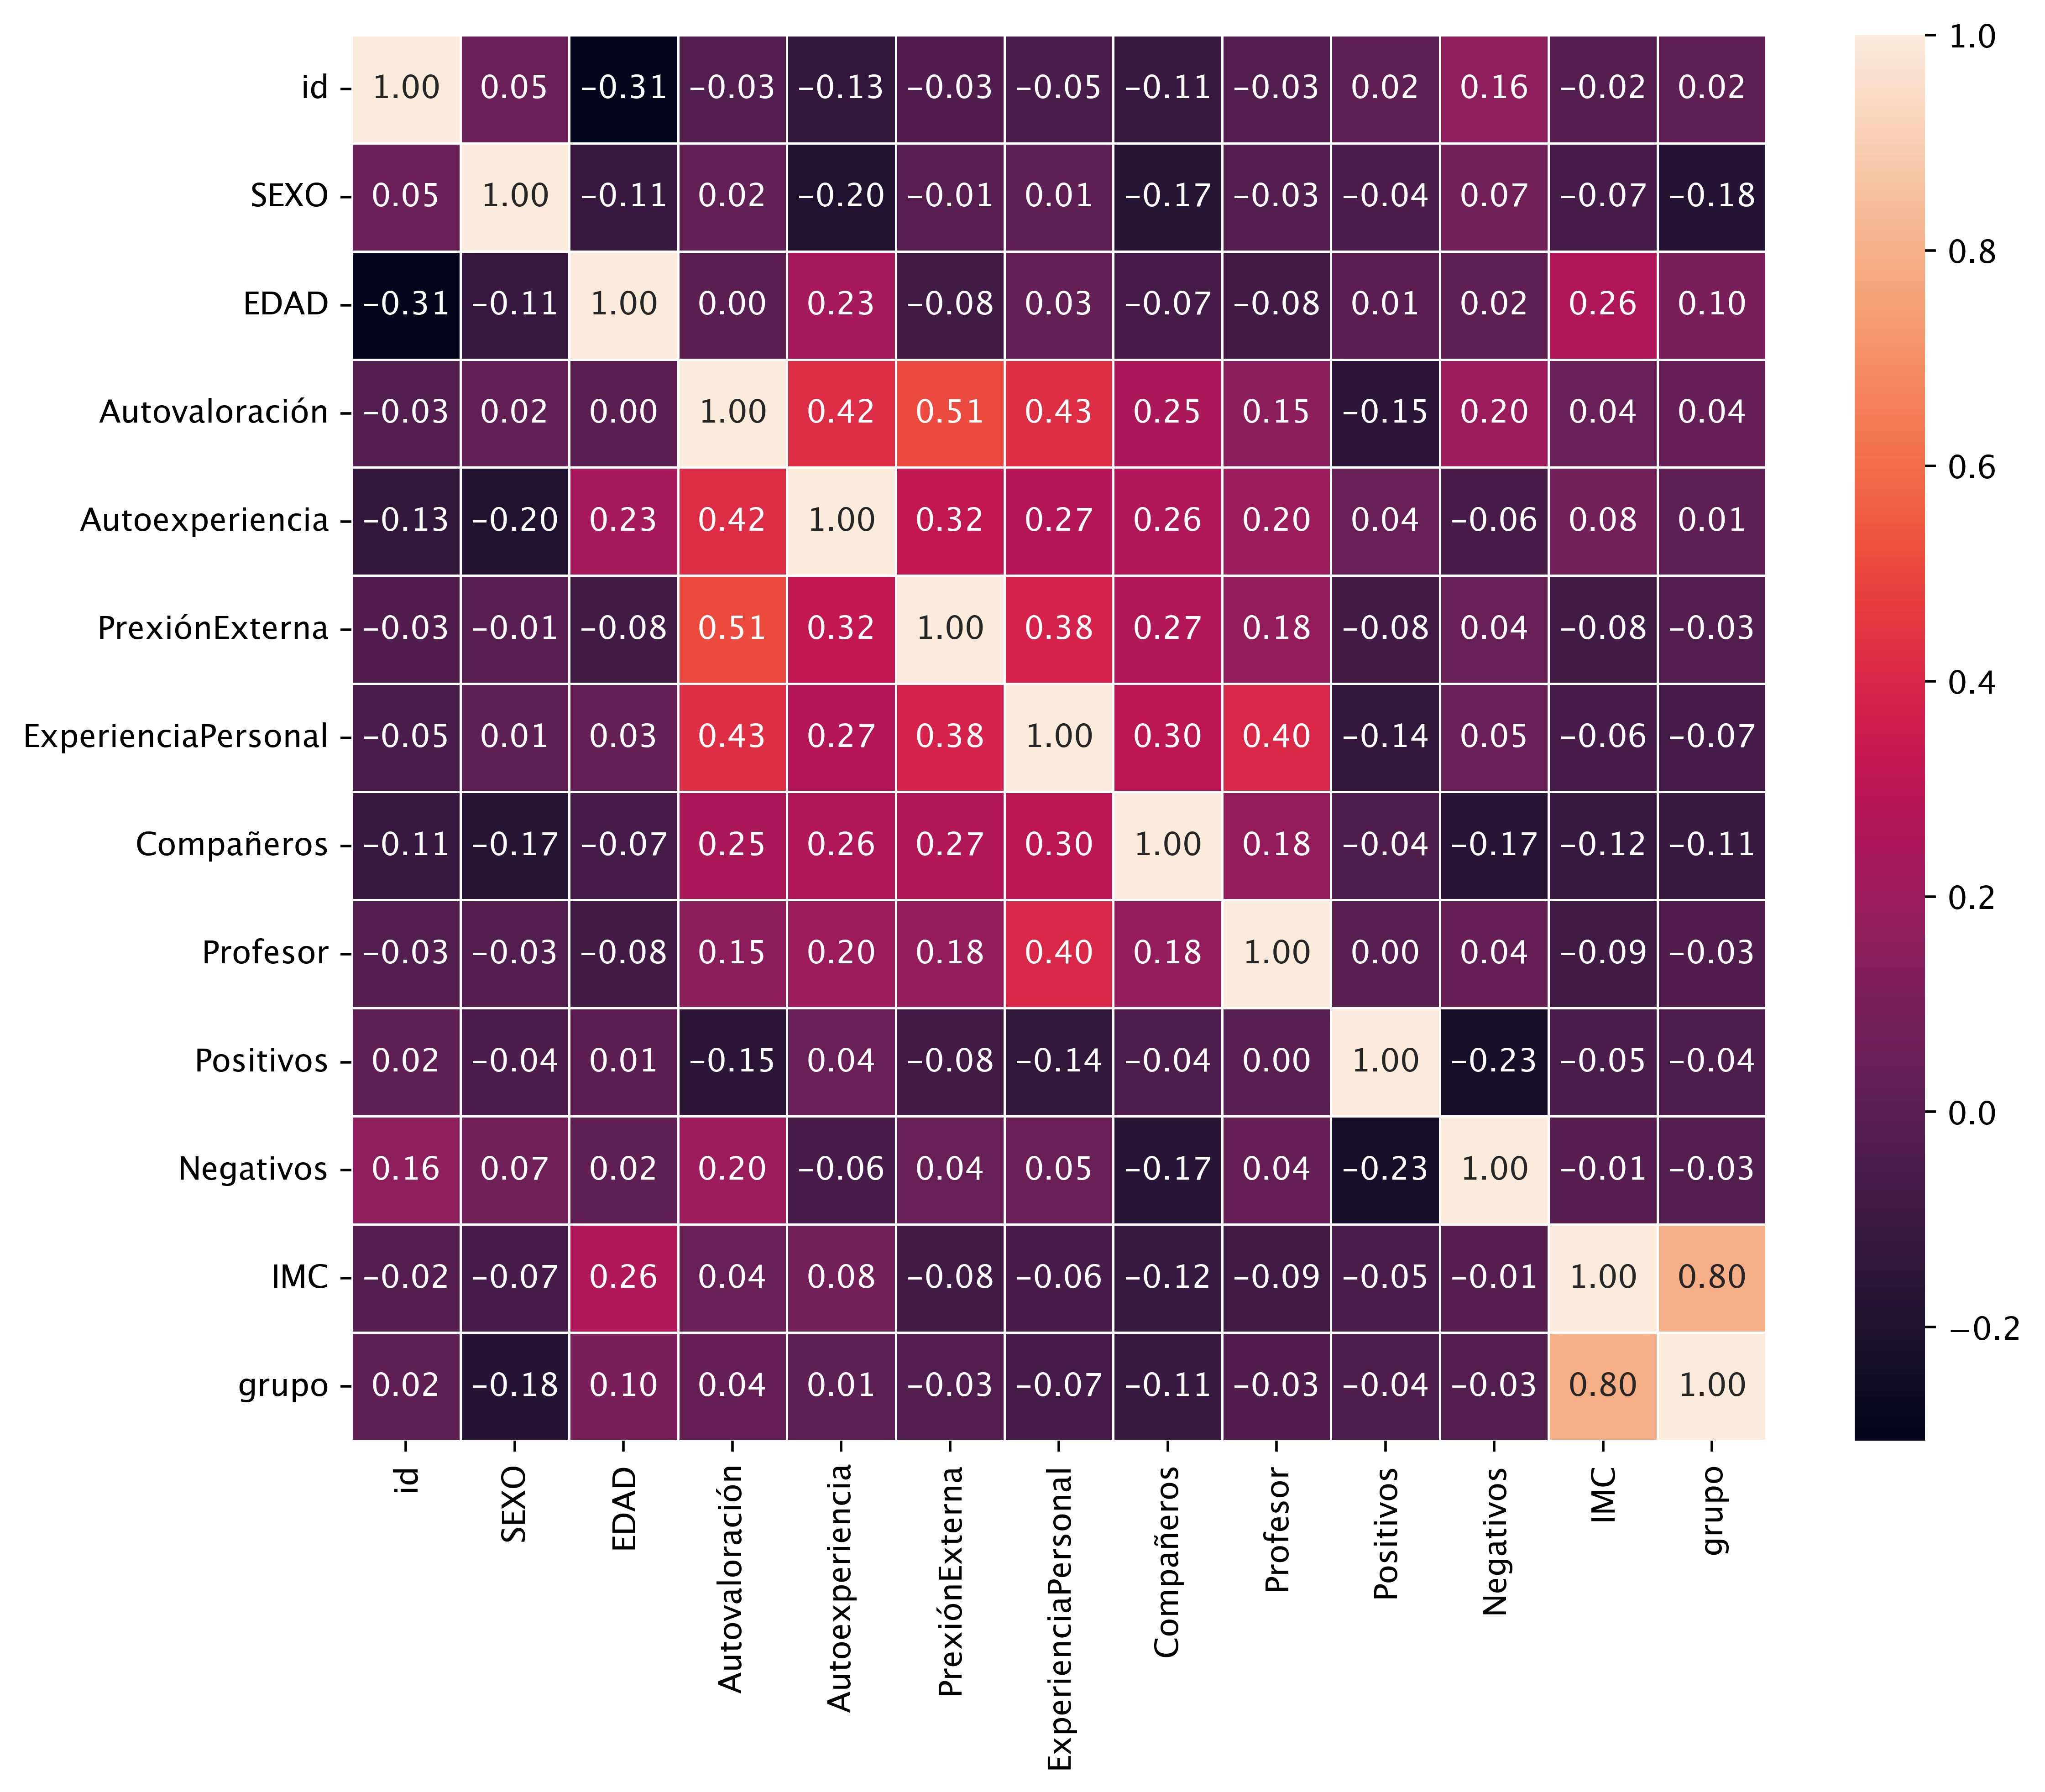

In [16]:
corr = tabla2_raw.corr()
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

* Outliers

In [17]:
zscore_df  = tabla2_raw.apply(stats.zscore, axis=0)
thres = 3

print("Que variables tienen outilers?")
print(zscore_df.applymap(lambda x: x>thres).any())

Que variables tienen outilers?
id                     False
SEXO                   False
EDAD                   False
Autovaloración         False
Autoexperiencia        False
PrexiónExterna          True
ExperienciaPersonal    False
Compañeros             False
Profesor               False
Positivos              False
Negativos              False
IMC                     True
grupo                  False
dtype: bool


/var/folders/dq/pwk6csh94hnd65tz2zzcp2br0000gn/T/ipykernel_61844/556520888.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(zscore_df.applymap(lambda x: x>thres).any())


In [18]:
print(zscore_df.loc[zscore_df["PrexiónExterna"]>3]["PrexiónExterna"])
tabla2_raw.loc[zscore_df["PrexiónExterna"]>3]

123    3.148214
Name: PrexiónExterna, dtype: float64


id  SEXO  EDAD  Autovaloración  Autoexperiencia  PrexiónExterna  \
123  334     1    11              36               38              31   

     ExperienciaPersonal  Compañeros  Profesor  Positivos  Negativos     IMC  \
123                   33          14        17         24         13  16.889   

     grupo  
123      1

In [19]:
print(zscore_df.loc[zscore_df["IMC"]>3]["IMC"])
tabla2_raw.loc[zscore_df["IMC"]>3]

215    3.157854
426    3.294293
427    3.508750
Name: IMC, dtype: float64


id  SEXO  EDAD  Autovaloración  Autoexperiencia  PrexiónExterna  \
215  381     1    11              31               20              11   
426  123     2    12              30               34              14   
427  111     2    11              16               27              14   

     ExperienciaPersonal  Compañeros  Profesor  Positivos  Negativos     IMC  \
215                   15           8        13         27         21  26.635   
426                   23           6        12         23         21  26.990   
427                   20          11         7         22         15  27.548   

     grupo  
215      2  
426      2  
427      2

In [20]:
# Eliminamos outliers
tabla2_raw = tabla2_raw.loc[(zscore_df["IMC"]<3) & (zscore_df["PrexiónExterna"]<3)]

# PREPROCESAMIENTO
* que hacer con variables categoricas: Las obviamos en el modelo
* Se han normalizado con un standard scaler
## Tabla 1: Jugadores

In [21]:
tabla1_raw.columns

Index(['ID', 'SEXO', 'EDAD', 'CATEGORIA', 'grupo', 'Categoria deportiva',
       'Influenciapaterna', 'organización', 'Expectativasallogro',
       'Miedoaloerrores', 'destre.Aperder', 'destre.Aganar',
       'dstre.durantejuego', 'destre.Juegojusto', 'habilidadessociales',
       'satisvida'],
      dtype='object')

In [22]:
columnas = ["Influenciapaterna", 	"organización", 	"Expectativasallogro",	"Miedoaloerrores",	"destre.Aperder",	"destre.Aganar", 	"dstre.durantejuego",	"destre.Juegojusto", 	"habilidadessociales",	"satisvida"]
tabla1 = tabla1_raw[columnas]

#Estandarizado 
st = StandardScaler()
tabla1_st = st.fit_transform(tabla1)
tabla1_st = pd.DataFrame(tabla1_st, columns=columnas)
tabla1_st

Influenciapaterna  organización  Expectativasallogro  Miedoaloerrores  \
0            -0.273388     -2.394738            -0.794966        -0.329887   
1            -0.273388     -2.394738            -0.794966        -0.329887   
2             1.002733      0.231395            -0.485562         0.448370   
3            -0.656224      0.043815            -0.640264         0.893088   
4            -0.783837      1.356881            -0.640264        -1.330502   
..                 ...           ...                  ...              ...   
269          -1.421897      1.356881            -1.723180        -1.775220   
270          -0.911449      1.356881            -0.176157         0.003652   
271          -0.145776     -0.706509            -0.949669        -0.663425   
272          -1.294285     -0.894090            -1.259073        -1.552861   
273          -0.145776      1.356881             0.287949         0.226011   

     destre.Aperder  destre.Aganar  dstre.durantejuego  destre.Juegojusto  \
0         -1.575840       0.208601           -0.461989          -0.084883   
1         -1.575840       0.208601           -0.461989          -0.084883   
2         -0.150823      -0.613798           -0.461989          -0.996954   
3         -0.507077       0.208601           -0.023979           0.827189   
4         -0.507077      -0.202598            0.414031           0.371153   
..              ...            ...                 ...                ...   
269        0.917940       1.442200            0.852041           0.827189   
270        0.917940       1.031001            0.852041           1.283224   
271        1.630448       1.442200            1.290051          -0.540918   
272        0.917940       1.031001            1.290051          -0.084883   
273        0.205431       1.442200            1.290051           1.283224   

     habilidadessociales  satisvida  
0              -0.768214  -1.664251  
1              -0.768214  -1.664251  
2              -0.993338  -1.095667  
3              -0.768214  -1.095667  
4              -1.443585  -0.811374  
..                   ...        ...  
269             0.807652   1.462964  
270             0.807652   1.462964  
271            -0.768214   1.462964  
272             0.807652   1.462964  
273             1.483023   1.462964  

[274 rows x 10 columns]

Variables categoricas

In [23]:
tabla1_sexo=tabla1_raw['SEXO']
tabla1_grupo=tabla1_raw['grupo']
tabla1_categoria=pd.get_dummies(tabla1_raw['Categoria deportiva'], drop_first=True, dtype=int)

## Tabla 2: Niños

In [24]:
columnas = ["Autovaloración", "Autoexperiencia","PrexiónExterna","ExperienciaPersonal","Compañeros","Profesor","Positivos","Negativos"]
tabla2 = tabla2_raw[columnas]

#Estandarizado 
st = StandardScaler()
tabla2_st = st.fit_transform(tabla2)
tabla2_st = pd.DataFrame(tabla2_st, columns=columnas)
tabla2_st

Autovaloración  Autoexperiencia  PrexiónExterna  ExperienciaPersonal  \
0         -1.240097        -1.068907       -0.951815            -0.709610   
1         -0.281106         0.128721       -0.200988            -0.324367   
2         -0.144107        -0.042369       -0.388695            -0.516988   
3          0.129890        -1.411086        0.737546            -1.094853   
4         -0.829101         0.470900       -0.576402            -0.131746   
..              ...              ...             ...                  ...   
419       -0.692102        -1.753265       -0.951815            -1.672717   
420        0.540887         0.641990        0.174426            -0.131746   
421        0.951883         1.155259        0.737546            -0.516988   
422        1.225880         0.470900        2.614615             1.216604   
423        2.047873         1.839617       -0.013281            -1.480095   

     Compañeros  Profesor  Positivos  Negativos  
0      0.069561  0.009822   1.312591  -0.881423  
1      0.856064 -0.287649   0.971992  -0.099029  
2      0.069561 -0.287649   0.290794  -0.359827  
3      0.462812  0.902237   0.290794  -0.620625  
4      0.462812  1.794652   1.312591  -0.881423  
..          ...       ...        ...        ...  
419   -1.503445 -1.180064   0.631393  -0.359827  
420    0.069561 -1.775007  -0.731002   0.161769  
421    1.249315 -1.180064  -1.412200   0.683365  
422    0.462812  0.604765  -0.731002  -0.359827  
423   -0.323690  0.009822  -0.731002  -0.620625  

[424 rows x 8 columns]

variables categoricas

In [25]:
tabla2_raw['SEXO']

0      1
1      1
2      1
3      1
4      1
      ..
421    2
422    2
423    2
424    2
425    2
Name: SEXO, Length: 424, dtype: int64

In [26]:
tabla2_sexo=tabla2_raw['SEXO'].replace([1,2], [1,0])
tabla2_grupo=tabla2_raw['grupo'].replace([1,2], [1,0])


# MODELADO

* Se han probado distintos modelos y se han evaluado su performance en base a el coeficiente de silouette y la inercia

## Tabla 1: Jugadores

### KMEANS

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns

inertias = []
silouette = []

k_candidates = range(2, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    preds = k_means.fit_predict(tabla1_st)
    inertias.append(k_means.inertia_)
    silouette.append(silhouette_score(tabla1_st, preds))

[Text(0.5, 1.0, 'Inertia K-Means'), Text(0, 0.5, 'inertia'), Text(0.5, 0, 'k')]

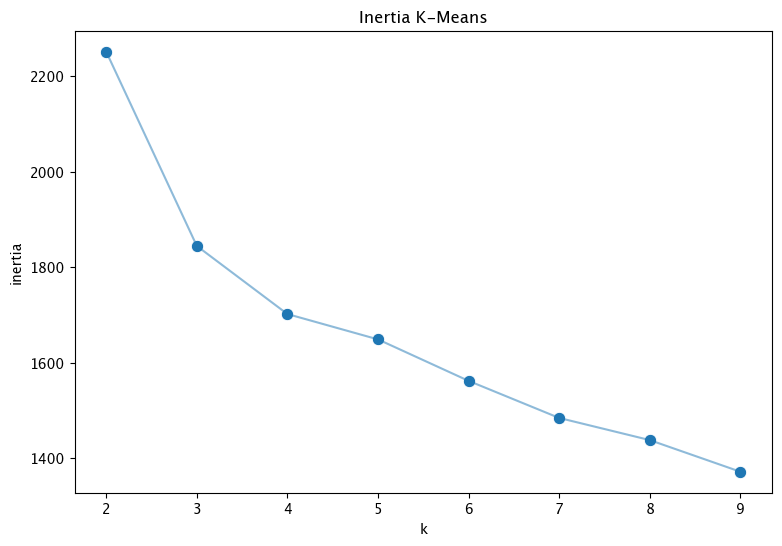

In [20]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
#sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k')

[Text(0.5, 1.0, 'Silouette score K-Means'),
 Text(0, 0.5, 'Silouette score'),
 Text(0.5, 0, 'k')]

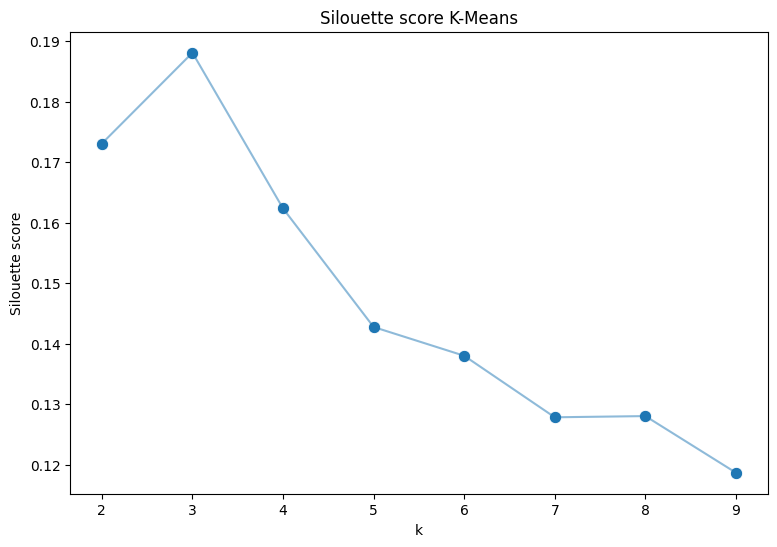

In [243]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=k_candidates, y = silouette, s=80, ax=ax)
#sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = silouette, alpha=0.5, ax=ax)
ax.set(title='Silouette score K-Means', ylabel='Silouette score', xlabel='k')

In [43]:
def calinski_harabasz_score(data, labels):
    """
    Calculate the Calinski-Harabasz index.
    """
    from sklearn.metrics import calinski_harabasz_score
    return calinski_harabasz_score(data, labels)

def maximum_diameter(data, labels):
    """
    Calculate the maximum diameter of clusters.
    """
    max_diameter = 0
    for label in np.unique(labels):
        cluster_points = data[labels == label]
        distances = euclidean_distances(cluster_points)
        max_cluster_diameter = np.max(distances)
        if max_cluster_diameter > max_diameter:
            max_diameter = max_cluster_diameter
    return max_diameter

def minimum_separation(data, labels):
    """
    Calculate the minimum separation between clusters.
    """
    min_separation = float('inf')
    for label1 in np.unique(labels):
        for label2 in np.unique(labels):
            if label1 != label2:
                cluster1_points = data[labels == label1]
                cluster2_points = data[labels == label2]
                distances = euclidean_distances(cluster1_points, cluster2_points)
                min_cluster_separation = np.min(distances)
                if min_cluster_separation < min_separation:
                    min_separation = min_cluster_separation
    return min_separation

def dunn_index(data, labels):
    """
    Calculate the Dunn index.
    """
    max_cluster_diameter = maximum_diameter(data, labels)
    min_intercluster_distance = minimum_separation(data, labels)
    return min_intercluster_distance / max_cluster_diameter


In [26]:


# Initialize lists to store metrics
inertias = []
silhouette = []
chs = []
max_diameters = []
min_separations = []
dunn_indices = []

k_candidates = range(2, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    preds = k_means.fit_predict(tabla1_st)
    
    # Inertia (within-cluster sum of squares)
    inertias.append(k_means.inertia_)
    
    # Silhouette Score
    silhouette.append(silhouette_score(tabla1_st, preds))
    
    # Calinski-Harabasz Index (CHI)
    chs.append(calinski_harabasz_score(tabla1_st, preds))
    
    # Maximum diameter
    max_diameters.append(maximum_diameter(tabla1_st, preds))
    
    # Minimum separation
    min_separations.append(minimum_separation(tabla1_st, preds))
    
    # Dunn index
    dunn_indices.append(dunn_index(tabla1_st, preds))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'K': k_candidates,
    'Inertia': inertias,
    'Silhouette': silhouette,
    'Calinski-Harabasz': chs,
    'Max Diameter': max_diameters,
    'Min Separation': min_separations,
    'Dunn Index': dunn_indices
})



In [28]:
results_df


K      Inertia  Silhouette  Calinski-Harabasz  Max Diameter  \
0  2  2250.620516    0.158850          59.144231      9.134731   
1  3  1844.212620    0.186407          65.816267      7.532074   
2  4  1701.755791    0.156806          54.909159      6.736316   
3  5  1648.696827    0.110497          44.514029      6.736316   
4  6  1561.948148    0.111001          40.426169      6.596665   
5  7  1484.358649    0.111397          37.643221      6.870506   
6  8  1438.028280    0.119315          34.404696      6.268904   
7  9  1371.833908    0.118652          33.036435      6.870506   

   Min Separation  Dunn Index  
0        1.312861    0.143722  
1        1.403673    0.186359  
2        1.263181    0.187518  
3        1.312861    0.194893  
4        1.312861    0.199019  
5        1.156093    0.168269  
6        1.193176    0.190333  
7        1.085318    0.157968

In [27]:
# BEST MODEL
kmeans_model = KMeans(n_clusters=3)
kmeans_labels = kmeans_model.fit_predict(tabla1_st)

## KPrototypes

In [245]:
df_categories = pd.concat([tabla1_st, tabla1_sexo, tabla1_grupo, tabla1_categoria], axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

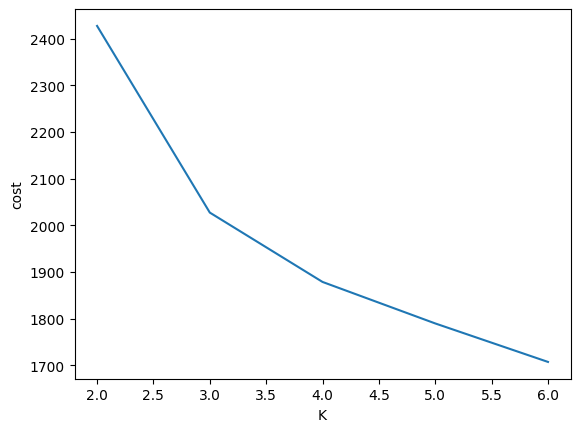

In [246]:
#Choosing optimal K value
cost = []
for num_clusters in list(range(2,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50) 
    kproto.fit_predict(df_categories, categorical=[10, 11, 12, 13])
    cost.append(kproto.cost_)

plt.plot(list(range(2,7)), cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [247]:
kproto = KPrototypes(n_clusters=3, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50) 
kproto_labels = kproto.fit_predict(df_categories, categorical=[10, 11, 12, 13])


### AGNES. Agglomerative clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering


silouette = []

k_candidates = range(2, 10)

for k in k_candidates:
    model = AgglomerativeClustering(compute_full_tree=True, n_clusters=k)
    preds = model.fit_predict(tabla1_st)
    silouette.append(silhouette_score(tabla1_st, preds))

<Axes: >

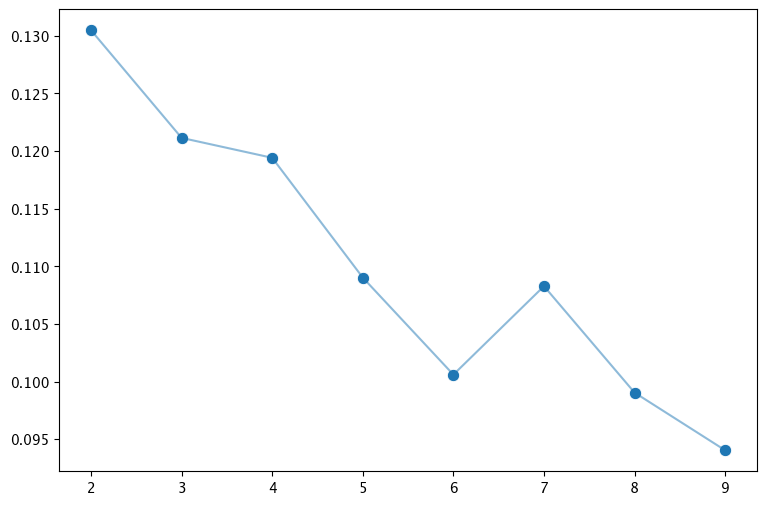

In [23]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=k_candidates, y = silouette, s=80, ax=ax)
#sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = silouette, alpha=0.5, ax=ax)
#ax.set(title='Silouette AGNES', silouette='Silouette', xlabel='k')

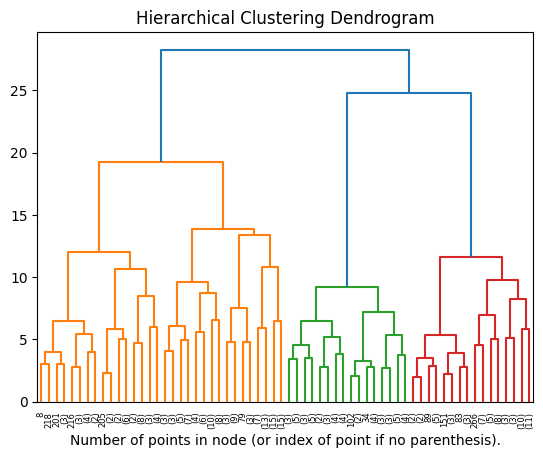

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(tabla1_st)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [251]:
agglo_model = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo_model.fit_predict(tabla1_st)

### DBSCAN. Cluster densidad

In [252]:
from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps=1.8, min_samples=5)
# fit model and predict clusters
dbscan_labels = model.fit_predict(tabla1_st)

set(dbscan_labels)

{-1, 0, 1, 2}

# OPTICS

In [253]:
from sklearn.cluster import OPTICS

# define the model
model = OPTICS(eps=1.8, min_samples=5)
# fit model and predict clusters
optics_labels = model.fit_predict(tabla1_st)
# retrieve unique clusters
set(optics_labels)

{-1, 0, 1, 2, 3, 4, 5, 6}

### BIRCH

In [254]:
from sklearn.cluster import Birch
# define the model
model = Birch(threshold=0.01, n_clusters=3)
# fit the model
birch_labels = model.fit_predict(tabla1_st)
# assign a cluster to each example
set(birch_labels)

{0, 1, 2}

### VISUALIZATION

In [36]:
pca =PCA(n_components=2)
tabla1_pca = pd.DataFrame(pca.fit_transform(tabla1_st), columns=["var1", "var2"])

In [37]:
pca.explained_variance_ratio_

array([0.2727657 , 0.23413556])

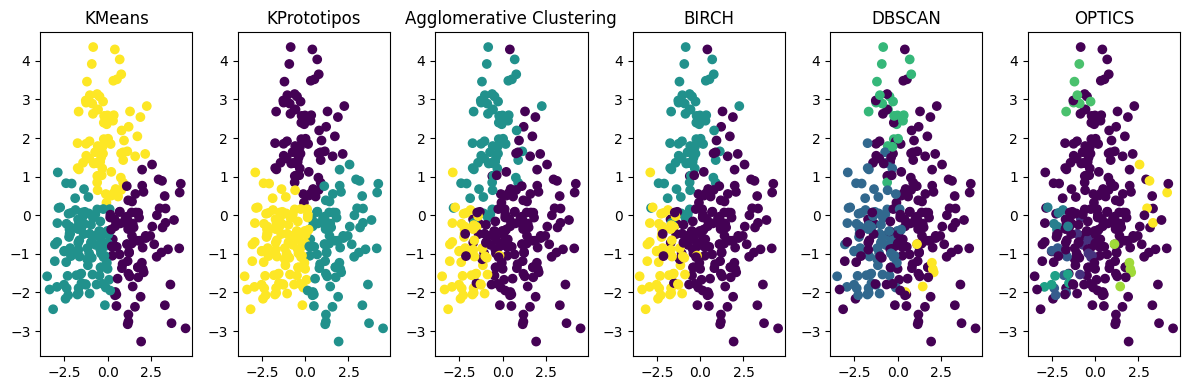

In [256]:
# Create a scatter plot
plt.figure(figsize=(12, 4))

# Plot for KMeans
plt.subplot(1, 6, 1)
plt.scatter(tabla1_pca["var1"], tabla1_pca["var2"], c=kmeans_labels, cmap='viridis')
plt.title('KMeans')

# Plot for Kproto
plt.subplot(1, 6, 2)
plt.scatter(tabla1_pca["var1"], tabla1_pca["var2"], c=kproto_labels, cmap='viridis')
plt.title('KPrototipos')

# Plot for Agglomerative Clustering
plt.subplot(1, 6, 3)
plt.scatter(tabla1_pca["var1"], tabla1_pca["var2"], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

# Plot for BIRCH
plt.subplot(1, 6, 4)
plt.scatter(tabla1_pca["var1"], tabla1_pca["var2"], c=birch_labels, cmap='viridis')
plt.title('BIRCH')

# Plot for DBSCAN
plt.subplot(1, 6, 5)
plt.scatter(tabla1_pca["var1"], tabla1_pca["var2"], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')

# Plot for OPTICS
plt.subplot(1, 6, 6)
plt.scatter(tabla1_pca["var1"], tabla1_pca["var2"], c=optics_labels, cmap='viridis')
plt.title('OPTICS')



plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'KMeans')

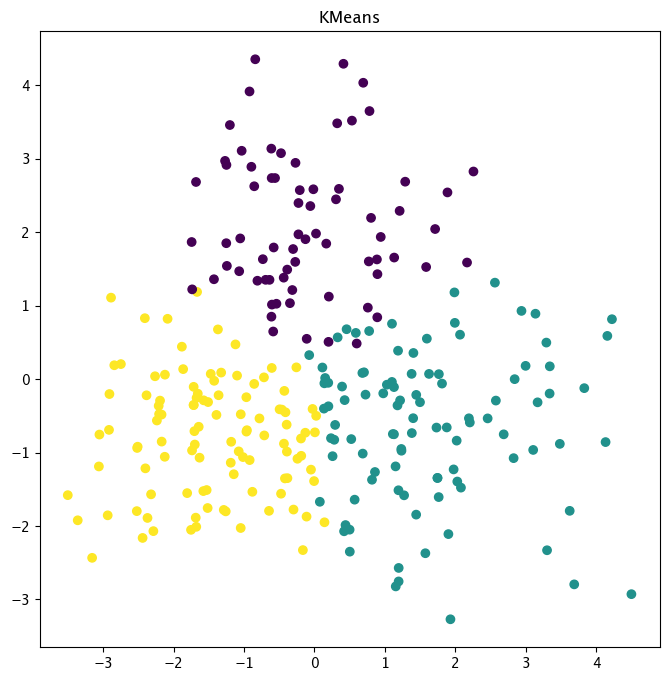

In [39]:
# Create a scatter plot
plt.figure(figsize=(8, 8))

# Plot for KMeans
plt.subplot(1, 1, 1)
plt.scatter(tabla1_pca["var1"], tabla1_pca["var2"], c=kmeans_labels, cmap='viridis')
plt.title('KMeans')

## TABLE 2
### KMEANS

In [40]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns

inertias = []
silouette = []

k_candidates = range(2, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    preds = k_means.fit_predict(tabla2_st)
    inertias.append(k_means.inertia_)
    silouette.append(silhouette_score(tabla2_st, preds))

[Text(0.5, 1.0, 'Inertia K-Means'), Text(0, 0.5, 'inertia'), Text(0.5, 0, 'k')]

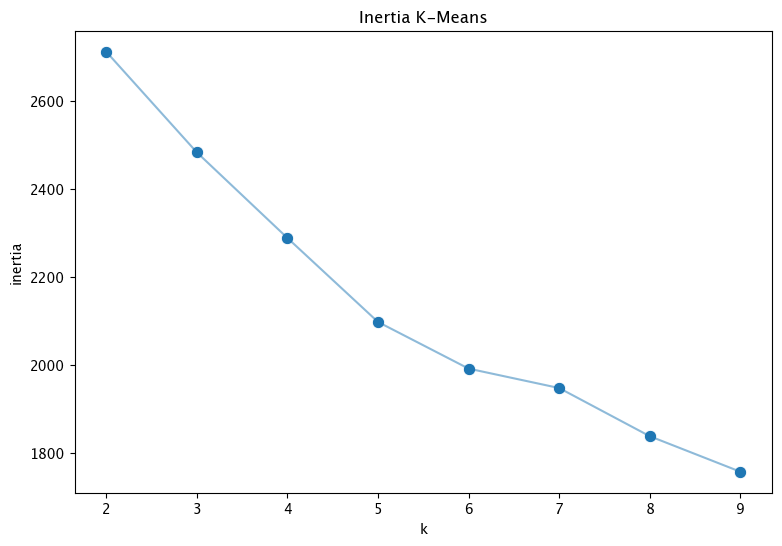

In [41]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
#sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k')

[Text(0.5, 1.0, 'Silouette score K-Means'),
 Text(0, 0.5, 'Silouette score'),
 Text(0.5, 0, 'k')]

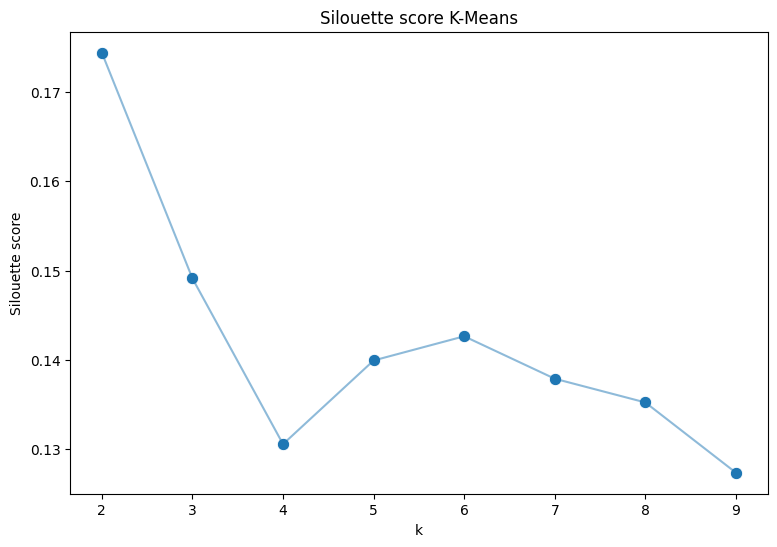

In [259]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=k_candidates, y = silouette, s=80, ax=ax)
#sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = silouette, alpha=0.5, ax=ax)
ax.set(title='Silouette score K-Means', ylabel='Silouette score', xlabel='k')

In [46]:


# Initialize lists to store metrics
inertias = []
silhouette = []
chs = []
max_diameters = []
min_separations = []
dunn_indices = []

k_candidates = range(2, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    preds = k_means.fit_predict(tabla2_st)
    
    # Inertia (within-cluster sum of squares)
    inertias.append(k_means.inertia_)
    
    # Silhouette Score
    silhouette.append(silhouette_score(tabla2_st, preds))
    
    # Calinski-Harabasz Index (CHI)
    chs.append(calinski_harabasz_score(tabla2_st, preds))
    
    # Maximum diameter
    max_diameters.append(maximum_diameter(tabla2_st, preds))
    
    # Minimum separation
    min_separations.append(minimum_separation(tabla2_st, preds))
    
    # Dunn index
    dunn_indices.append(dunn_index(tabla2_st, preds))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'K': k_candidates,
    'Inertia': inertias,
    'Silhouette': silhouette,
    'Calinski-Harabasz': chs,
    'Max Diameter': max_diameters,
    'Min Separation': min_separations,
    'Dunn Index': dunn_indices
})



In [47]:
results_df

K      Inertia  Silhouette  Calinski-Harabasz  Max Diameter  \
0  2  2711.024754    0.178248         106.001081      7.982400   
1  3  2482.794139    0.124519          77.085664      7.982400   
2  4  2288.604556    0.124512          67.497621      7.982400   
3  5  2098.083806    0.134153          64.600718      6.968390   
4  6  1992.267940    0.137366          58.735875      6.968390   
5  7  1948.185750    0.117733          51.506942      6.896896   
6  8  1838.950160    0.122352          50.189252      6.626053   
7  9  1758.374420    0.121398          48.194700      6.777655   

   Min Separation  Dunn Index  
0        0.713055    0.089328  
1        0.905189    0.113398  
2        0.896916    0.112362  
3        0.854630    0.122644  
4        0.829888    0.119093  
5        0.986900    0.143093  
6        0.657693    0.099259  
7        0.896916    0.132334

In [72]:
# BEST MODEL
kmeans_model = KMeans(n_clusters=3)
kmeans_labels = kmeans_model.fit_predict(tabla2_st)

## KPrototypes

In [49]:
df_categories = pd.concat([tabla2_st.reset_index(drop=True), tabla2_sexo.reset_index(drop=True), tabla2_grupo.reset_index(drop=True)], axis = 1, ignore_index=True   )

In [50]:
#Choosing optimal K value
cost = []
for num_clusters in list(range(2,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50) 
    kproto.fit_predict(df_categories, categorical=[8, 9])
    cost.append(kproto.cost_)



[Text(0.5, 1.0, 'Inertia K-Means'), Text(0, 0.5, 'inertia'), Text(0.5, 0, 'k')]

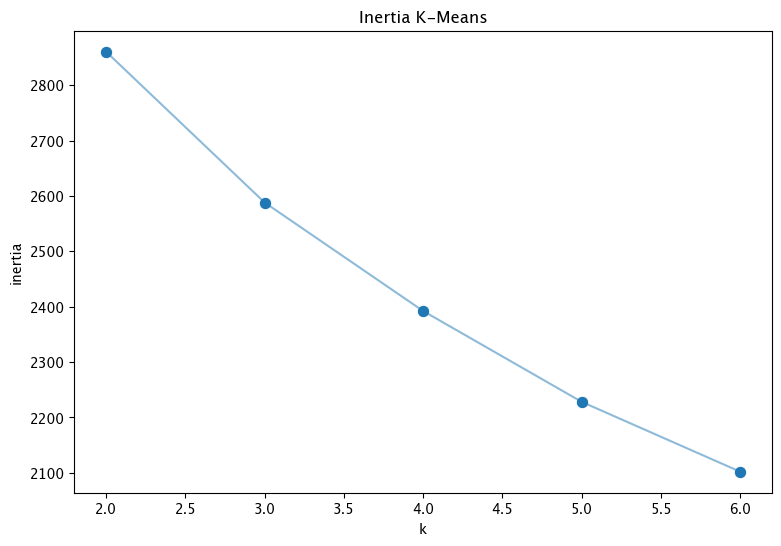

In [51]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=list(range(2,7)), y = cost, s=80, ax=ax)
#sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.lineplot(x=list(range(2,7)), y = cost, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k')

In [71]:
kproto = KPrototypes(n_clusters=3, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50) 
kproto_labels = kproto.fit_predict(df_categories, categorical=[8, 9])

### AGNES. Agglomerative clustering

In [27]:
from sklearn.cluster import AgglomerativeClustering


silouette = []

k_candidates = range(2, 10)

for k in k_candidates:
    model = AgglomerativeClustering(compute_full_tree=True, n_clusters=k)
    preds = model.fit_predict(tabla2_st)
    silouette.append(silhouette_score(tabla2_st, preds))

<Axes: title={'center': 'Silouette'}>

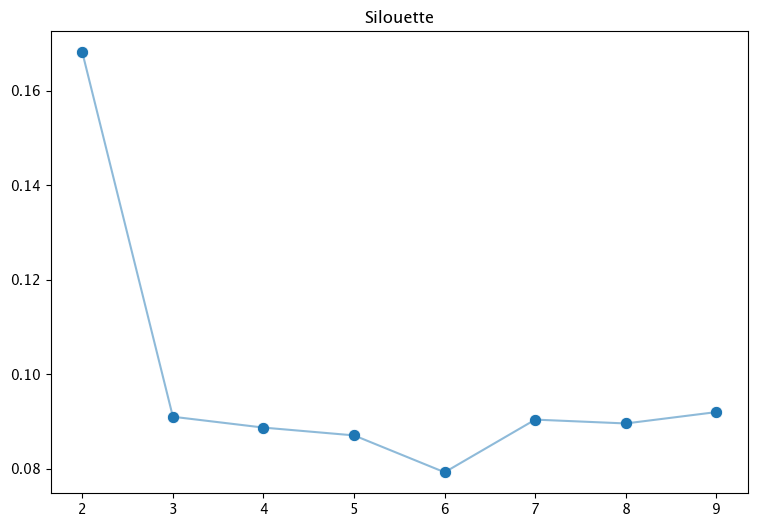

In [69]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x=k_candidates, y = silouette, s=80, ax=ax).set_title('Silouette')
#sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = silouette, alpha=0.5, ax=ax)
#sns.set(title='Silouette AGNES', silouette='Silouette', xlabel='k')

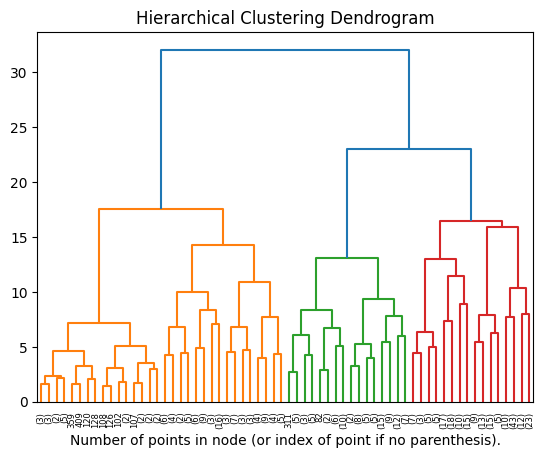

In [282]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(tabla2_st)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [65]:
# Initialize lists to store metrics
inertias = []
silhouette = []
chs = []
max_diameters = []
min_separations = []
dunn_indices = []

k_candidates = range(2, 10)

for k in k_candidates:
    model = AgglomerativeClustering( n_clusters=k)

    preds = model.fit_predict(tabla2_st)
    
    # Inertia (within-cluster sum of squares)
    #inertias.append(k_means.inertia_)
    
    # Silhouette Score
    silhouette.append(silhouette_score(tabla2_st, preds))
    
    # Calinski-Harabasz Index (CHI)
    chs.append(calinski_harabasz_score(tabla2_st, preds))
    
    # Maximum diameter
    max_diameters.append(maximum_diameter(tabla2_st, preds))
    
    # Minimum separation
    min_separations.append(minimum_separation(tabla2_st, preds))
    
    # Dunn index
    dunn_indices.append(dunn_index(tabla2_st, preds))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'K': k_candidates,
    'Silhouette': silhouette,
    'Calinski-Harabasz': chs,
    'Max Diameter': max_diameters,
    'Min Separation': min_separations,
    'Dunn Index': dunn_indices
})



In [66]:
results_df

K  Silhouette  Calinski-Harabasz  Max Diameter  Min Separation  Dunn Index
0  2    0.168166          75.481573      8.056772        1.268184    0.157406
1  3    0.090993          62.897170      7.810183        0.986900    0.126361
2  4    0.088696          53.289081      7.810183        0.986900    0.126361
3  5    0.087042          48.295763      7.618770        0.896916    0.117724
4  6    0.079233          45.561925      7.618770        0.896916    0.117724
5  7    0.090385          43.101921      7.240197        0.896916    0.123880
6  8    0.089571          40.973571      7.240197        0.896916    0.123880
7  9    0.091980          39.600285      7.240197        0.896916    0.123880

In [28]:
agglo_model = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo_model.fit_predict(tabla2_st)

In [32]:
tabla2_st["cluster"] = agglo_labels
tabla2_st["SEXO"] =  tabla2_raw["SEXO"]
tabla2_st["grupo"] =  tabla2_raw["grupo"]

In [34]:
tabla2_st

Autovaloración  Autoexperiencia  PrexiónExterna  ExperienciaPersonal  \
0         -1.240097        -1.068907       -0.951815            -0.709610   
1         -0.281106         0.128721       -0.200988            -0.324367   
2         -0.144107        -0.042369       -0.388695            -0.516988   
3          0.129890        -1.411086        0.737546            -1.094853   
4         -0.829101         0.470900       -0.576402            -0.131746   
..              ...              ...             ...                  ...   
419       -0.692102        -1.753265       -0.951815            -1.672717   
420        0.540887         0.641990        0.174426            -0.131746   
421        0.951883         1.155259        0.737546            -0.516988   
422        1.225880         0.470900        2.614615             1.216604   
423        2.047873         1.839617       -0.013281            -1.480095   

     Compañeros  Profesor  Positivos  Negativos  cluster  SEXO  grupo  
0      0.069561  0.009822   1.312591  -0.881423        2   1.0    1.0  
1      0.856064 -0.287649   0.971992  -0.099029        1   1.0    1.0  
2      0.069561 -0.287649   0.290794  -0.359827        1   1.0    1.0  
3      0.462812  0.902237   0.290794  -0.620625        1   1.0    1.0  
4      0.462812  1.794652   1.312591  -0.881423        1   1.0    1.0  
..          ...       ...        ...        ...      ...   ...    ...  
419   -1.503445 -1.180064   0.631393  -0.359827        2   2.0    2.0  
420    0.069561 -1.775007  -0.731002   0.161769        0   2.0    2.0  
421    1.249315 -1.180064  -1.412200   0.683365        0   2.0    2.0  
422    0.462812  0.604765  -0.731002  -0.359827        0   2.0    2.0  
423   -0.323690  0.009822  -0.731002  -0.620625        0   2.0    2.0  

[424 rows x 11 columns]

In [33]:
tabla2_st.to_excel("estudio_ninos_agnes_3cluster.xlsx")

### DBSCAN. Cluster densidad

In [73]:
from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps=1.2, min_samples=5)
# fit model and predict clusters
dbscan_labels = model.fit_predict(tabla2_st)

set(dbscan_labels)

{-1, 0, 1, 2, 3, 4, 5}

# OPTICS

In [74]:
from sklearn.cluster import OPTICS

# define the model
model = OPTICS(eps=1.90, min_samples=5)
# fit model and predict clusters
optics_labels = model.fit_predict(tabla2_st)
# retrieve unique clusters
set(optics_labels)

{-1, 0, 1, 2}

### BIRCH

In [75]:
from sklearn.cluster import Birch
# define the model
model = Birch(threshold=0.01, n_clusters=6)
# fit the model
birch_labels = model.fit_predict(tabla2_st)
# assign a cluster to each example
set(birch_labels)

{0, 1, 2, 3, 4, 5}

### VISUALIZATION

In [76]:
pca =PCA(n_components=2)
tabla2_pca = pd.DataFrame(pca.fit_transform(tabla2_st), columns=["var1", "var2"])

In [77]:
pca.explained_variance_ratio_

array([0.3179844 , 0.16725695])

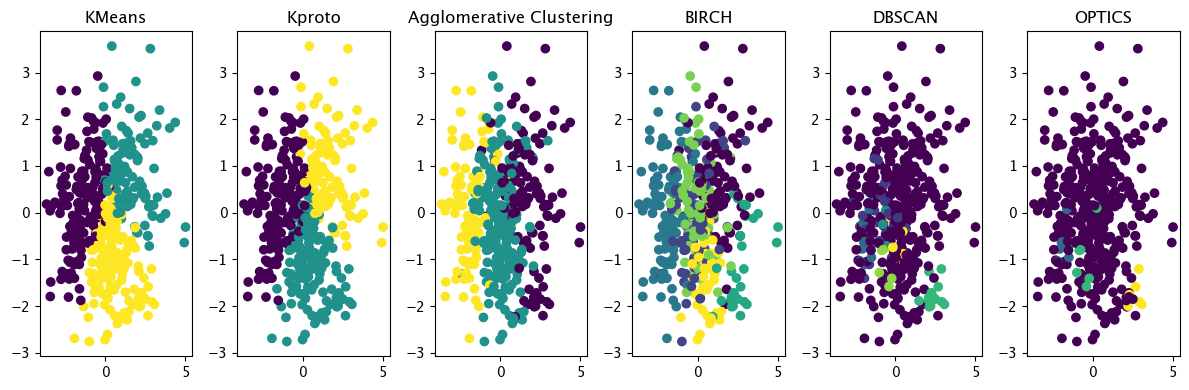

In [78]:
# Create a scatter plot
plt.figure(figsize=(12, 4))

# Plot for KMeans
plt.subplot(1, 6, 1)
plt.scatter(tabla2_pca["var1"], tabla2_pca["var2"], c=kmeans_labels, cmap='viridis')
plt.title('KMeans')

# Plot for KMeans
plt.subplot(1, 6, 2)
plt.scatter(tabla2_pca["var1"], tabla2_pca["var2"], c=kproto_labels, cmap='viridis')
plt.title('Kproto')

# Plot for Agglomerative Clustering
plt.subplot(1, 6, 3)
plt.scatter(tabla2_pca["var1"], tabla2_pca["var2"], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

# Plot for BIRCH
plt.subplot(1, 6, 4)
plt.scatter(tabla2_pca["var1"], tabla2_pca["var2"], c=birch_labels, cmap='viridis')
plt.title('BIRCH')

# Plot for DBSCAN
plt.subplot(1, 6, 5)
plt.scatter(tabla2_pca["var1"], tabla2_pca["var2"], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')

# Plot for OPTICS
plt.subplot(1, 6, 6)
plt.scatter(tabla2_pca["var1"], tabla2_pca["var2"], c=optics_labels, cmap='viridis')
plt.title('OPTICS')



plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Agglomerative Clustering')

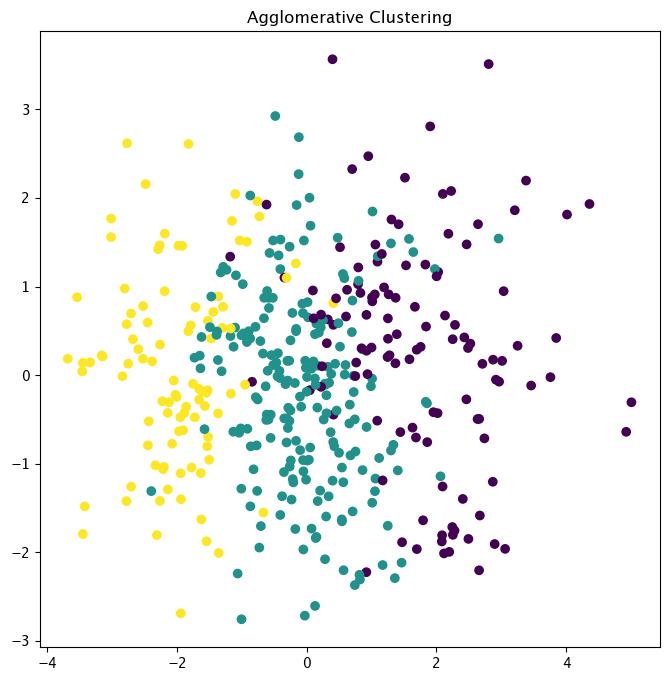

In [80]:
# Create a scatter plot
plt.figure(figsize=(8, 8))

# Plot for Agglomerative Clustering
plt.subplot(1, 1, 1)
plt.scatter(tabla2_pca["var1"], tabla2_pca["var2"], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

Text(0.5, 1.0, 'KMEANS Clustering')

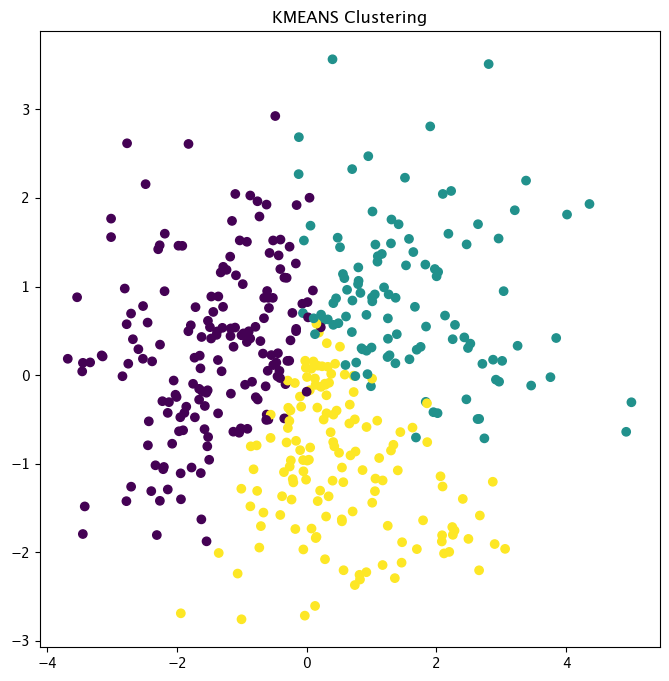

In [81]:
# Create a scatter plot
plt.figure(figsize=(8, 8))

# Plot for Agglomerative Clustering
plt.subplot(1, 1, 1)
plt.scatter(tabla2_pca["var1"], tabla2_pca["var2"], c=kmeans_labels, cmap='viridis')
plt.title('KMEANS Clustering')